In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Synthetic Fraud data

### Load data and get some basic information

In [4]:
fraud_data = pd.read_csv('data/PS_20174392719_1491204439457_log.csv')

In [5]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
fraud_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


Hey! No missing data, that's pretty cool. Percentage of fraud cases:

In [7]:
sum(fraud_data['isFraud'])/len(fraud_data.index) * 100

0.12908204481801522

In [8]:
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
fraud_data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [10]:
fraud_data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
fraud_data['nameOrig'].nunique()

6353307

In [11]:
fraud_data['nameDest'].nunique()

2722362

There aren't too many accounts that occur more than once. Let's see how many have more than one appearance.

In [79]:
fraud_data['nameOrig'].value_counts()[fraud_data['nameOrig'].value_counts() > 1].count()

9298

That's not a much larger fraction than the fraud cases. Well, then again, I guess, this would make it too easy :D

In [80]:
fraud_data['nameDest'].value_counts()[fraud_data['nameDest'].value_counts() > 1].count()

459658

Right, so this is worth looking into later. I wonder what the distribution is of how many times the different destination accounts are used.

<ipython-input-12-007565ee068e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  fraud_data.hist(ax=ax, bins=50, log=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113ab9880>,
      dtype=object)

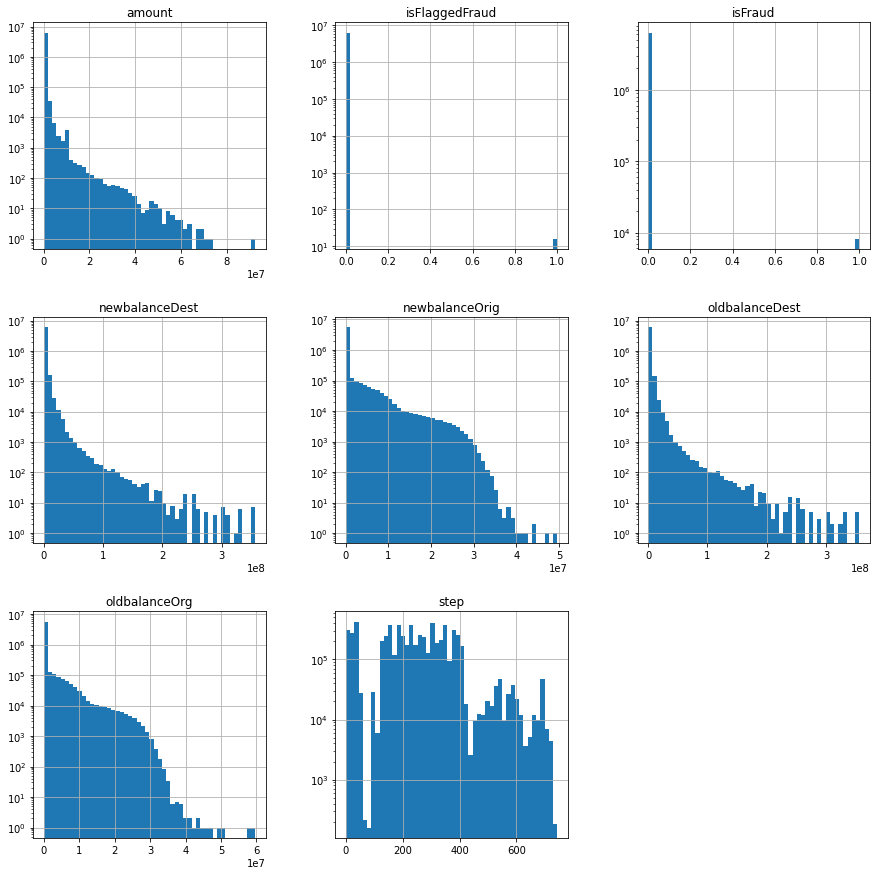

In [12]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
fraud_data.hist(ax=ax, bins=50, log=True)

Hm. Makes one wonder whether the balances are 0 when there is no information.

In [13]:
fraud_data_cols = fraud_data.columns.to_list()
fraud_data_cols.pop()
fraud_data_cols.pop()
fraud_data_cols

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest']

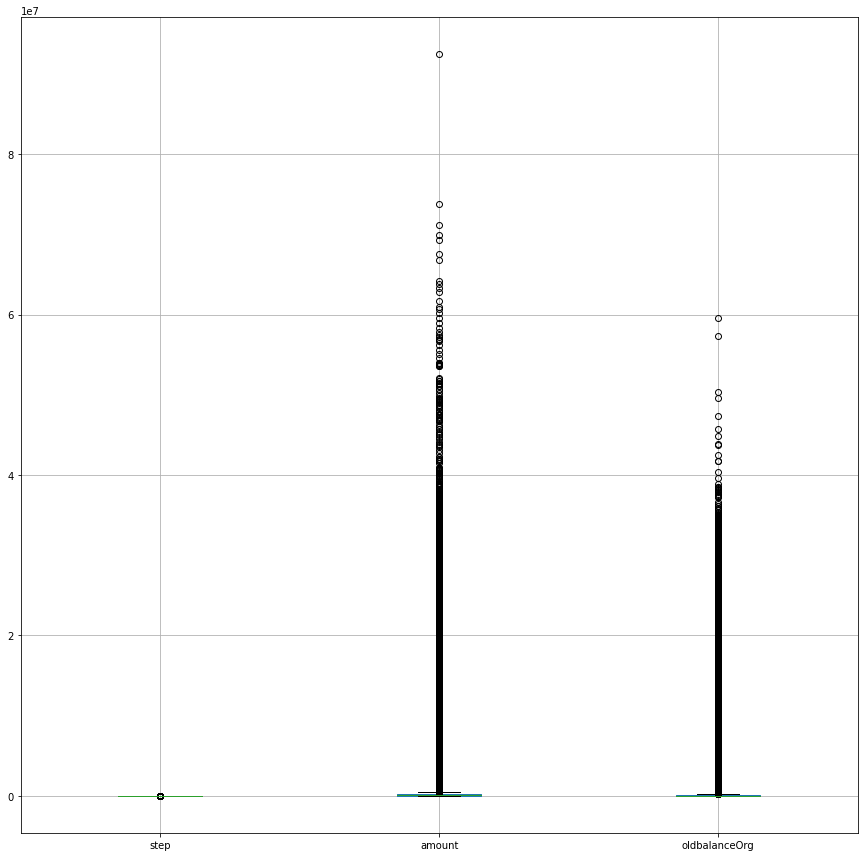

In [20]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
fraud_data[fraud_data_cols[:5]].boxplot(ax=ax)

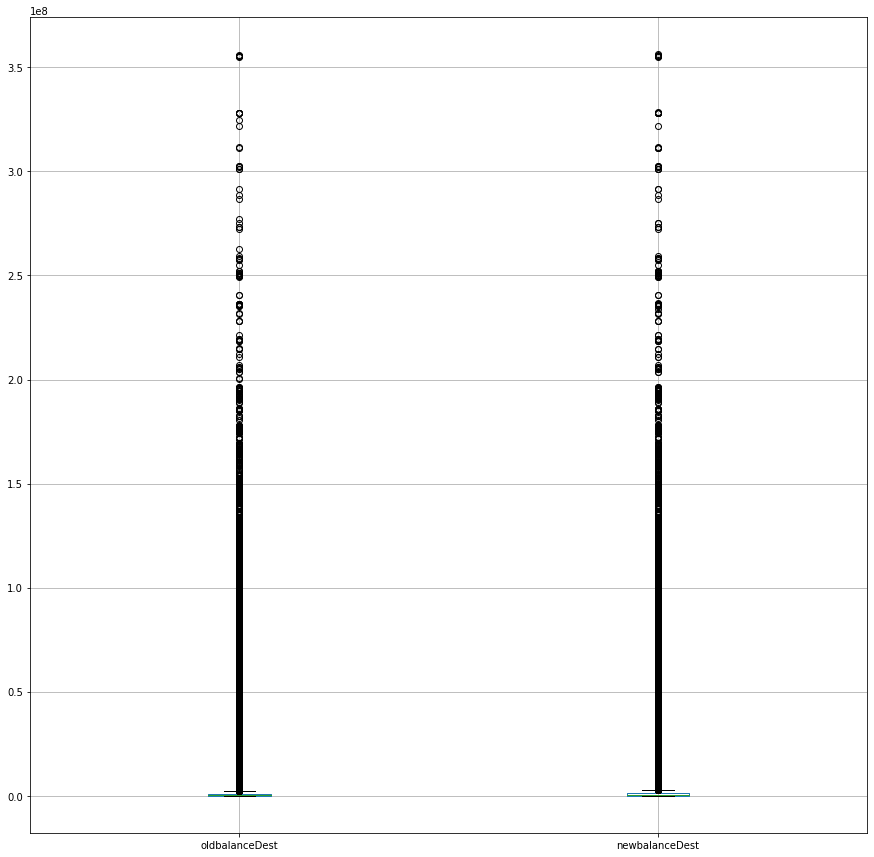

In [21]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
fraud_data[['oldbalanceDest','newbalanceDest']].boxplot(ax=ax)

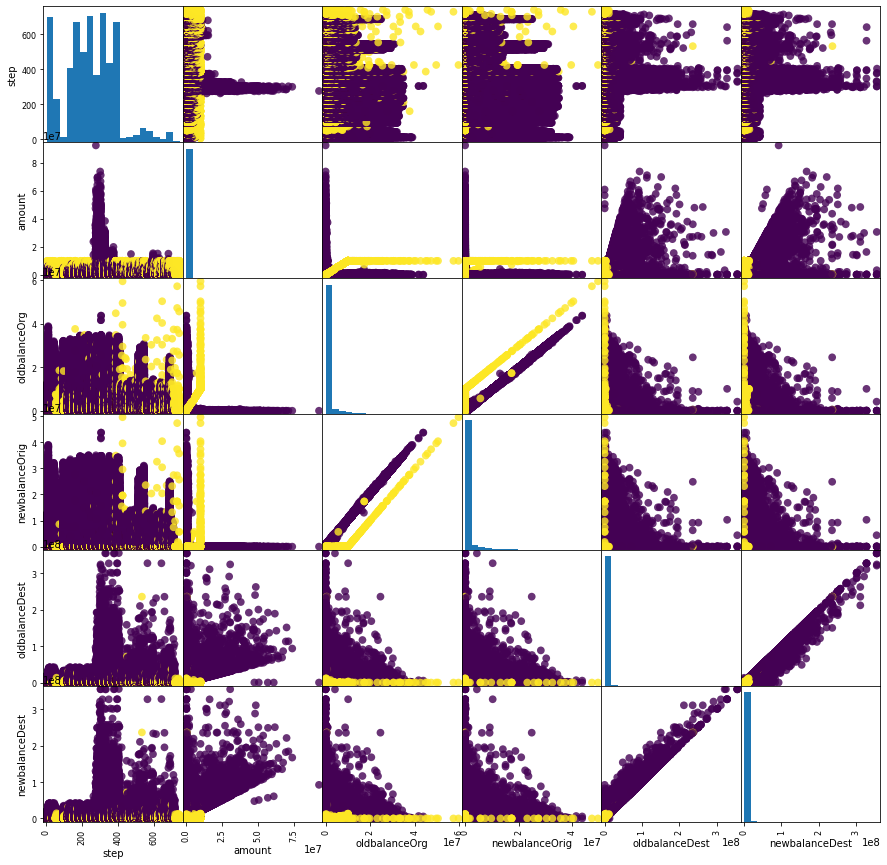

In [16]:
grr = pd.plotting.scatter_matrix(fraud_data[fraud_data_cols], c=fraud_data['isFraud'], figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)

Right, so we see that most of the time, the destination accounts are relatively empty, whereas the origin accounts tend to have a higher balance later on. This could be coincidence or a form of drift. It's also consistent with my observations in the fraud space that the average fraud amount is not very high, but levels off somewhere. We see here that there seems to be a genuine limit, which appears a little artificial, but well.  
It's also a bit odd that there are so many high balance fraudulent cases later in the set. It's as if the fraudsters only found the fat accounts later, but the amount they transfer did not increase.
I wonder what the peak in the amount means - we have no explanations other than the names for the meaning of the variables, so the step could be in minutes and thus be a transaction peak of some sort, like lunch, but the amounts are strangely too high for that. The data, looking at the amount over time, does not appear periodic or seasonal, but that might simply require higher resolution.
Let's also look at the distribution of fraud by type.  

In [17]:
fraud_data.groupby('type').sum()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,
CASH_IN,342111075,2.363674e+11,5.024078e+12,5.260438e+12,2.221949e+12,2.052897e+12,0,0
CASH_OUT,539015395,3.944130e+11,1.029783e+11,3.909851e+10,3.351233e+12,3.784342e+12,4116,0
DEBIT,10293386,2.271992e+08,2.844196e+09,2.699778e+09,6.186360e+10,6.268676e+10,0,0
PAYMENT,525778430,2.809337e+10,1.467682e+11,1.330439e+11,0.000000e+00,0.000000e+00,0,0
TRANSFER,131445897,4.852920e+11,2.901255e+10,5.482651e+09,1.368300e+12,1.894261e+12,4097,16


Splendid. This shows that only two types are used for frauds. This is a great indicator, and there are only 5 levels. I think it's worth looking into encoding this in ordinal form and making the fraud-heavy types the lowest or the highest ranking, that should make life easier for any tree. I guess that would be target encoding without using actual means or other target values?

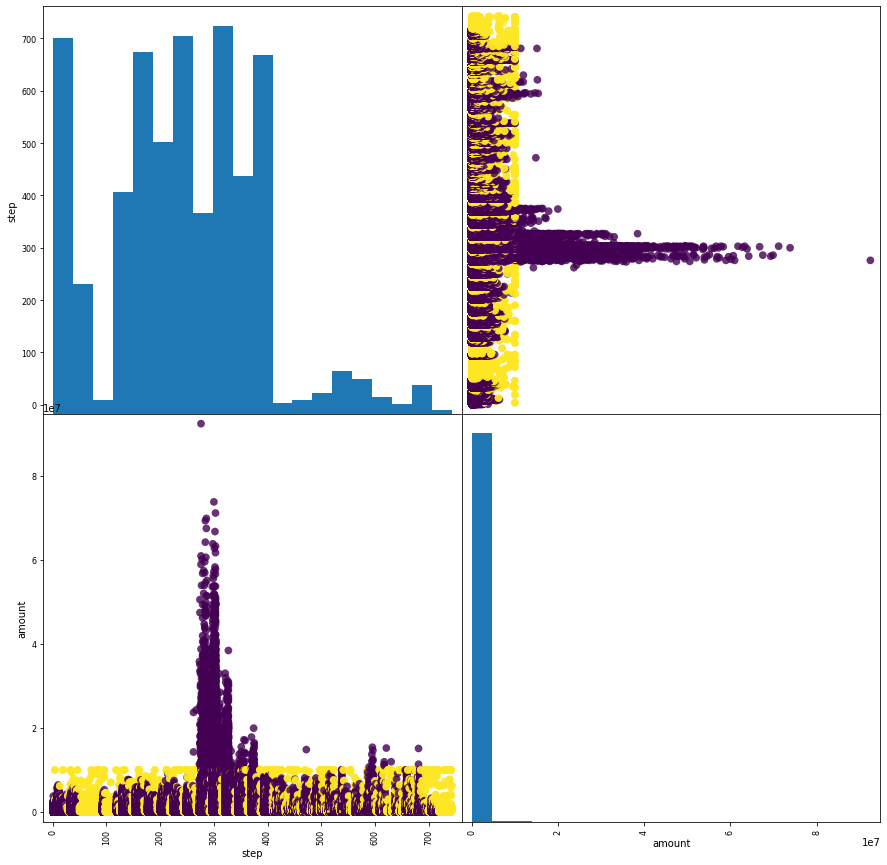

In [18]:
grr = pd.plotting.scatter_matrix(fraud_data[['step', 'amount']], c=fraud_data['isFraud'], figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)

Okay, so seasonality does not seem to be an issue here. It's just that most of the time, we can see the fraud amounts being among the highest, but not always. We could make a rule that if it is before step 290 or after 700 and more than 80, it has a higher likelihood to be fraud. But who wants rules. We want machines!  
Also, let's try this seaborn qq-plot plugin.

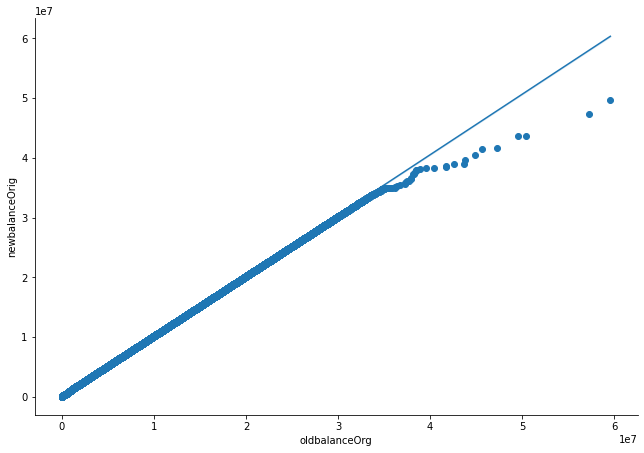

In [28]:
import seaborn as sns
from seaborn_qqplot import qqplot

qqplot(fraud_data,
       x='oldbalanceOrg',
       y='newbalanceOrig',
       height=6,
       aspect=1.5,
       display_kws={"identity":False,"fit":True,"reg":True,"ci":0.025})

Yeah, it does not look like we're getting something out of this we're not already seeing from the scatter- and boxplots. We know that the balances are long and at higher values, there are more withdrawals than deposits.

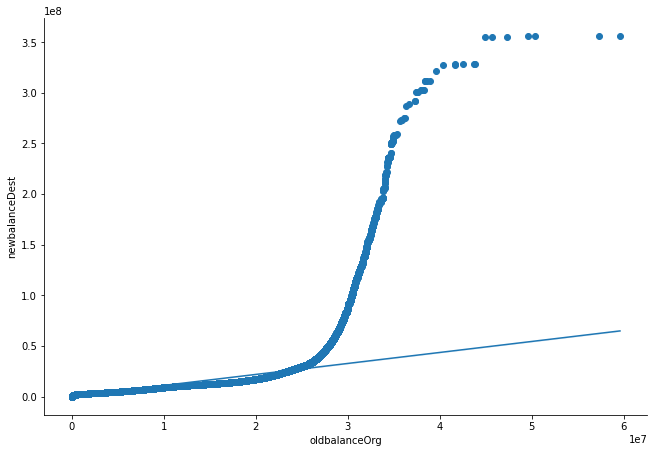

In [29]:
qqplot(fraud_data,
       x='oldbalanceOrg',
       y='newbalanceDest',
       height=6,
       aspect=1.5,
       display_kws={"identity":False,"fit":True,"reg":True,"ci":0.025})

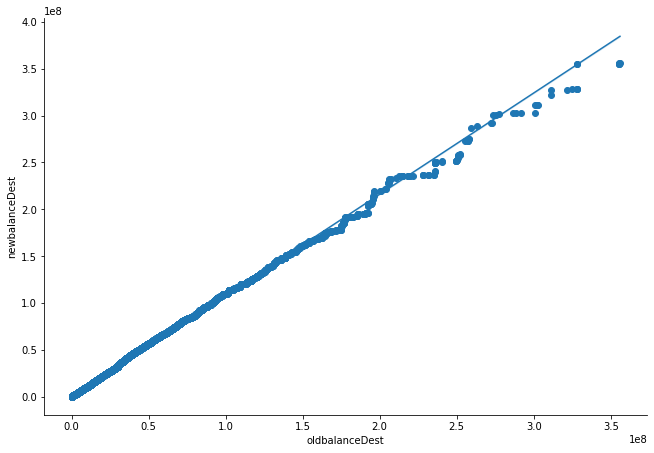

In [30]:
qqplot(fraud_data,
       x='oldbalanceDest',
       y='newbalanceDest',
       height=6,
       aspect=1.5,
       display_kws={"identity":False,"fit":True,"reg":True,"ci":0.025})

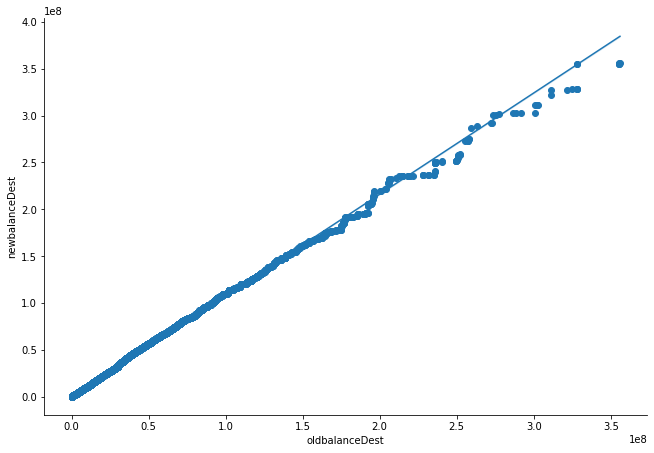

In [27]:
qqplot(fraud_data,
       x='oldbalanceDest',
       y='newbalanceDest',
       height=6,
       aspect=1.5,
       display_kws={"identity":False,"fit":True,"reg":True,"ci":0.025})

Okay! So considering these long tails, this beautiful page recommends a PPCC plot. https://www.itl.nist.gov/div898/handbook/eda/section3/ppccplot.htm We'll do that right after we look at the distribution of doubles and triples vs frauds.

In [47]:
name_orig_counts = fraud_data['nameOrig'].value_counts().to_frame().reset_index().rename({'index': 'nameOrig', 'nameOrig': 'nameOrig_counts'}, axis=1)
name_dest_counts = fraud_data['nameDest'].value_counts().to_frame().reset_index().rename({'index': 'nameDest', 'nameDest': 'nameDest_counts'}, axis=1)

In [48]:
name_orig_counts.head()

,nameOrig,nameOrig_counts
0,C1677795071,3
1,C1832548028,3
2,C363736674,3
3,C400299098,3
4,C2098525306,3


In [50]:
fraud_data = fraud_data.merge(name_orig_counts, how='left', on='nameOrig')

In [52]:
fraud_data = fraud_data.merge(name_dest_counts, how='left', on='nameDest')

In [53]:
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_counts,nameDest_counts
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,44
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,41
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,1


In [58]:
fraud_data[(fraud_data['isFraud'] > 0) & (fraud_data['nameDest_counts'] > 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_counts,nameDest_counts
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,1,44
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,1,41
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,1,30
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,1,35
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,1,4
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0,1,6
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,1,2
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,1,3


In [63]:
fraud_data[(fraud_data['isFraud'] > 0) & (fraud_data['nameOrig_counts'] > 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_counts,nameDest_counts
217321,13,CASH_OUT,6188514.81,C686187434,6188514.81,0.0,C1562904239,381607.21,6424681.56,1,0,2,37
646015,35,CASH_OUT,171788.82,C432562518,171788.82,0.0,C1529736160,19962.00,0.00,1,0,2,10
788647,39,TRANSFER,152042.16,C1118399210,152042.16,0.0,C104038589,0.00,0.00,1,0,2,23
1059491,98,CASH_OUT,63624.08,C431038121,63624.08,0.0,C1925188324,0.00,63624.08,1,0,2,21
1496506,142,TRANSFER,346374.54,C171834973,346374.54,0.0,C1249377837,0.00,0.00,1,0,2,7
2197236,185,CASH_OUT,164213.17,C803411135,164213.17,0.0,C1325722809,1681702.11,1845915.27,1,0,2,19
2516796,205,TRANSFER,566156.42,C1498185758,566156.42,0.0,C1639518321,0.00,0.00,1,0,2,8
2531840,205,TRANSFER,216179.15,C1863683348,216179.15,0.0,C1011918912,0.00,0.00,1,0,2,7
3193184,243,CASH_OUT,1290193.08,C876181265,1290193.08,0.0,C24324787,0.00,1290193.08,1,0,2,8
3610975,269,TRANSFER,676882.33,C1627918307,676882.33,0.0,C1636966593,0.00,0.00,1,0,2,3


In [60]:
fraud_data.isFraud.sum()

8213

Okay, this is great, so more than half of all frauds go to accounts that have multiple transactions. Now I wonder whether we can isolate particular accounts only fraudsters use? That being said, I would think that this is only an indicator not a defining characteristic (ultimately. At 6 million transactions, it's a pretty certain guess).  
Also, I wonder if there is the opposite - are there accounts that fraudsters never use? Would "used in fraud" make a good category? Hm. Considering that there are more businesses than fraudsters, most businesses are likely *not* to be used in fraud, so if there is a tendency, than it could be useful.

In [66]:
set_frauds = set(fraud_data[(fraud_data['isFraud'] > 0) & (fraud_data['nameDest_counts'] > 1)].nameDest.values)

In [67]:
set_non_frauds = set(fraud_data[(fraud_data['isFraud'] < 1) & (fraud_data['nameDest_counts'] > 1)].nameDest.values)

In [70]:
len(set_frauds.intersection(set_non_frauds))

5492

In [71]:
len(set_non_frauds.intersection(set_frauds))

5492

In [87]:
len(set_frauds.union(set_non_frauds))

459658

Hm, okay. Fair enough. The destination accounts can be Amazon and whatnot, so it's not necessary. The majority of these names would be doubles and triples, I'd imagine.

In [75]:
unique_fraud_multiples = set_frauds.difference(set_non_frauds)

In [74]:
len(set_non_frauds.difference(set_frauds))

454162

In [78]:
fraud_data[fraud_data['nameDest'].isin(list(unique_fraud_multiples))]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_counts,nameDest_counts
5374709,376,TRANSFER,449032.97,C1012053866,449032.97,0.0,C1148781766,0.00,0.00,1,0,1,2
5396749,377,TRANSFER,434006.52,C1619687935,434006.52,0.0,C1837027614,0.00,0.00,1,0,1,2
5988255,415,TRANSFER,461369.99,C152541672,461369.99,0.0,C14138104,0.00,0.00,1,0,1,2
6008662,436,CASH_OUT,4135944.29,C1649836304,4135944.29,0.0,C14138104,0.00,4135944.29,1,0,1,2
6106802,525,CASH_OUT,203280.85,C1031966846,203280.85,0.0,C686334805,0.00,203280.85,1,0,1,2
6255874,597,CASH_OUT,517183.38,C1850286862,517183.38,0.0,C1837027614,0.00,517183.38,1,0,1,2
6272188,621,CASH_OUT,425861.93,C2103073329,425861.93,0.0,C686334805,203280.85,629142.78,1,0,1,2
6281786,650,CASH_OUT,50523.78,C1711085884,50523.78,0.0,C1148781766,0.00,50523.78,1,0,1,2


Again, yeah. This looks legit, there's no reason why there shouldn't be a few accounts that buy from the same shop and those shops being only used for frauds in this case. Additionally, these are, by the indices, quite late in the piece as well - we're going by time and so lopping off the last 10%, i.e. around 600k lines. Doubles aren't surprising, I was hoping for the equivalent of a fencing job, but that's probably too much to ask for. Fraudsters aren't as stupid as they show them in the movies.  
This is walking the beautiful line between encoding and feature engineering - I could imagine making a ranked category could be useful. Line up the destinations by rank and see how common they are. That is also an encoding that could be passed on into data processing for real world data - BUT needs to be done separately to be precise, on the validation set so that there is no information leakage.  
Also, important, looking at the data values, if I want to employ a GAN to produce this data, I have to scale the data for the GAN. There'll be no way around it. But first things first.  
Let's look at the distribution of frequency of destination accounts.

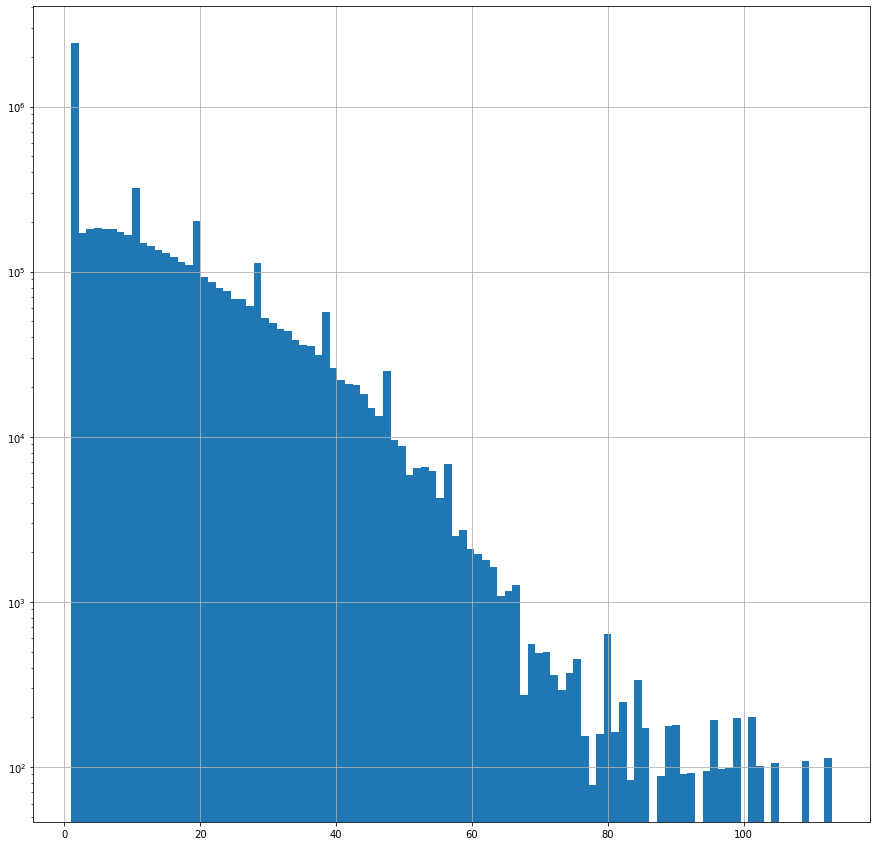

In [88]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
fraud_data['nameDest_counts'].hist(ax=ax, log=True, bins=100)

Exponential drop in population with a long tail. Interesting spikes, but nothing unusual.

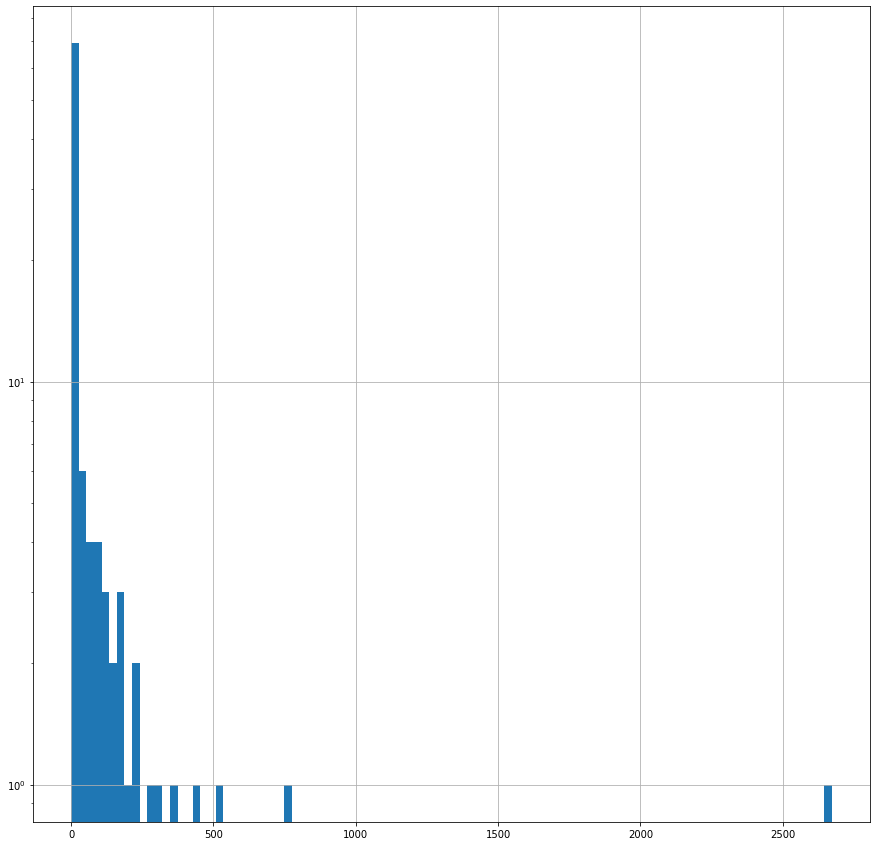

In [94]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
fraud_data.groupby('nameDest_counts').sum()['isFraud'].hist(ax=ax, bins=100, log=True)

In [ ]:
# fraud_data.groupby(['nameDest', 'nameDest_counts']).sum()

Hm, right. So this operation crashed my browser 3 times now. Maybe I should set a maximum number of rows after all... or at least do the calculation and display it separately.

In [98]:
isfraud_by_counts = fraud_data.groupby(['nameDest', 'nameDest_counts']).sum()

In [103]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)

In [105]:
len(isfraud_by_counts.index)

2722362

Yeah, so maybe I shouldn't try to willy-nilly display 2.7 million rows, but why doesn't it work with limited numbers to display?

In [113]:
isfraud_by_counts.head()

,nameDest,nameDest_counts,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_counts
0,C1000004082,6,2225,2259324.39,1154157.30,1458928.63,5478283.93,7221996.97,0,0,6
1,C1000004940,13,3337,2534004.05,21677801.31,22163633.90,5802678.15,6946481.24,0,0,13
2,C1000013769,13,3718,6204082.94,6210381.15,6671446.14,20362603.26,25574238.16,0,0,13
3,C100001587,9,2098,1404313.66,37378118.52,37803620.14,3043147.37,3555121.73,0,0,9
4,C1000015936,16,1784,2267960.19,13640644.93,14450490.40,3466945.36,4131807.47,0,0,17


In [107]:
isfraud_by_counts.to_csv('isfraud_by_counts.csv')

In [112]:
isfraud_by_counts= isfraud_by_counts.reset_index()

In [120]:
isfraud_by_counts[(isfraud_by_counts['nameDest_counts'] > 2) & (isfraud_by_counts['isFraud'] > 1)].sort_values('nameDest_counts')

,nameDest,nameDest_counts,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_counts
245062,C1827800010,3,1472,1.320692e+06,1.149521e+06,1.892513e+05,0.000000e+00,8.984529e+04,2,0,3
192625,C1650668671,4,1521,1.792432e+05,7.811183e+04,4.934000e+03,2.066174e+05,3.858606e+05,2,0,4
561398,C964377943,4,1428,6.204778e+06,6.035568e+06,0.000000e+00,1.187657e+06,7.392435e+06,2,0,4
198189,C1669818195,4,2175,8.983132e+06,8.927546e+06,7.863191e+04,1.335542e+06,2.536222e+06,2,0,4
473457,C668046170,5,1964,1.096590e+07,1.372326e+07,3.766819e+06,3.010786e+05,7.622460e+05,2,0,5
425624,C505532836,6,2298,8.559714e+05,2.072214e+06,2.005071e+06,2.969613e+06,3.568893e+06,2,0,6
230857,C1780714769,6,1929,1.251668e+06,8.324942e+05,0.000000e+00,1.531053e+06,2.605040e+06,2,0,6
55009,C1185292292,6,2119,8.513509e+05,2.875252e+05,0.000000e+00,1.322604e+06,2.367427e+06,2,0,6
468311,C650699445,9,2634,3.207842e+06,3.324124e+06,2.935041e+06,1.006855e+07,1.346189e+07,2,0,9
76709,C1259079602,9,2658,3.184910e+06,4.352537e+06,3.333985e+06,4.807540e+06,7.105828e+06,2,0,9


Ha, okay, so that gives us some information about the distribution - all other channels, however many times they may have been used for transactions have a maximum of 1 fraud case. There is literally a handful of cases where it could be said that half of their transactions were fraudulent, but they, together with the cases we've seen further up that have been used twice and are all frauds, are so rare that it would be only useful to include these if they fall through the cracks regardless of model. Let's see how many have 2 transactions and exactly 1 fraud case.

In [121]:
len(isfraud_by_counts[(isfraud_by_counts['nameDest_counts'] == 2) & (isfraud_by_counts['isFraud'] == 1)])

745

Hm, that makes less than 10% of the total fraud cases. Hmmm...